In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [3]:
# 1차년도
NUMERIC = ['year', 'HE_FEV1FVC', 'age', 'Total_slp_wk']
CATEGORICAL = ['sex', 'occp', 'EC1_1', 'cfam', 'marri_1', 'BH9_11', 'HE_DM', 'DC6_dg', 'DF2_dg', 'HE_HPdg', 'BP5']
ONE_HOT = ['BS3_1', 'edu', 'BP1', 'D_1_1', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'BO1_1', 'BO2_1']
# 2차년도
NUMERIC2 = ['DI1_ag', 'DE1_ag', 'LQ1_mn', 'BS6_2_1', 'BS6_3']
CATEGORICAL2 = ['DI1_pt', 'DE1_pt', 'DE1_3', 'BH1', 'BH2_61', 'LQ4_00', 'LQ4_05', 'LQ1_sb', 'MO1_wk', 'HE_cough1', 'HE_sput1', 'BD1', 'BD7_5', 'BP6_10', 'BP6_31']
ONE_HOT2 = ['DI1_2', 'EC_pedu_1', 'EC_pedu_2', 'BS5_1', 'BD7_4']
# 생성변수
NUMERIC3 = ['eq_5d']
CATEGORICAL3 = ['sm_present', 'mh_stress']
ONE_HOT3 = ['cage']
# Targets
TARGETS = ['BE3_31', 'BE5_1']

f_NUMERIC = (NUMERIC + NUMERIC2 + NUMERIC3).copy()
for idx in ['DI1_ag', 'DE1_ag']:
    f_NUMERIC.remove(idx)

f_CATEGORICAL = CATEGORICAL + CATEGORICAL2 + CATEGORICAL3.copy()
for idx in ['DC6_dg', 'DF2_dg', 'DI1_pt', 'DE1_pt', 'DE1_3', 'BP6_31']:
    f_CATEGORICAL.remove(idx)

f_ONE_HOT = ONE_HOT + ONE_HOT2 + ONE_HOT3.copy()
f_ONE_HOT.remove('DI1_2')

In [4]:
ff = pd.read_csv('./dataset/ff.csv')
ff.head()

,year,HE_FEV1FVC,age,Total_slp_wk,sex,occp,EC1_1,cfam,marri_1,BH9_11,...,EC_pedu_1,EC_pedu_2,BS5_1,BD7_4,eq_5d,sm_present,mh_stress,cage,BE3_31,BE5_1
0,2007.0,0.699366,74.0,8.0,1.0,0.0,0.0,2.0,1.0,0.0,...,9.0,9.0,비흡연자,없었음,0.720,1,1.0,7,8.0,1.0
1,2007.0,0.699220,69.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,...,초졸이하,초졸이하,비흡연자,1년동안있었음,1.000,1,0.0,6,8.0,1.0
2,2007.0,0.698630,80.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,...,9.0,9.0,비흡연자,없었음,0.723,0,0.0,7,1.0,1.0
3,2007.0,0.698466,49.0,8.0,1.0,1.0,1.0,3.0,1.0,1.0,...,무학,무학,언젠가금연,1년동안있었음,1.000,0,0.0,4,1.0,1.0
4,2007.0,0.697403,77.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,...,무학,무학,비흡연자,없었음,0.602,0,0.0,7,8.0,1.0


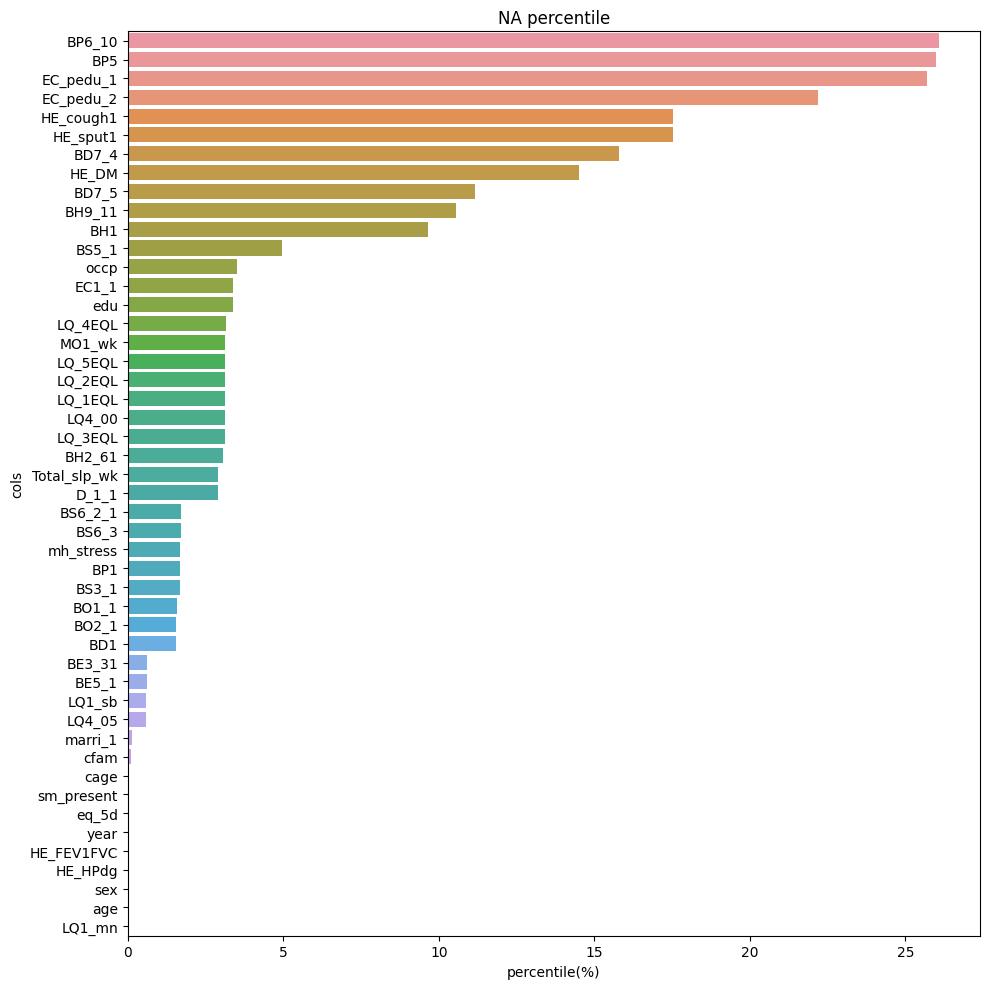

In [5]:
# 결측치 확인
ff_na = (ff.isna().sum()/ ff.shape[0] * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.title('NA percentile')
sns.barplot(x=ff_na.values, y=ff_na.index)
plt.xlabel('percentile(%)')
plt.ylabel('cols')
plt.tight_layout()

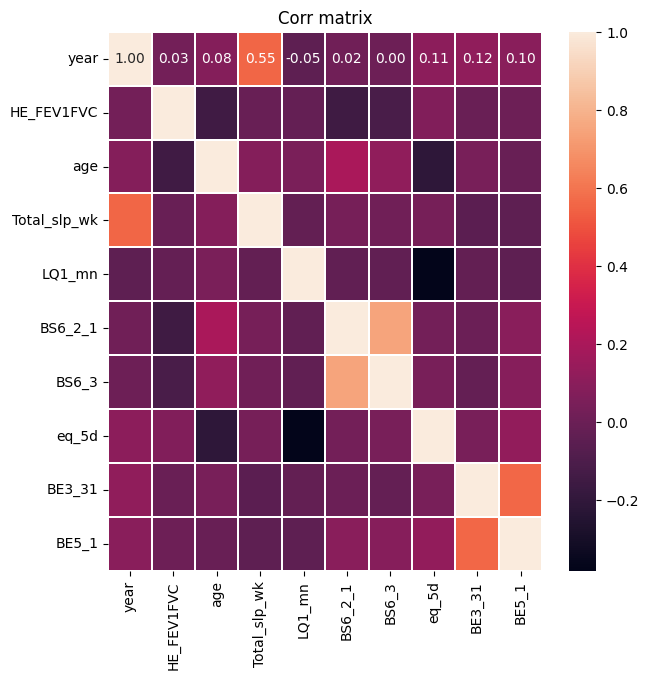

In [12]:
# 상관계수 확인
plt.figure(figsize=(7, 7))
plt.title('Corr matrix')
sns.heatmap(ff[f_NUMERIC + TARGETS].corr(), linewidths=.2, annot=True, fmt='.2f')

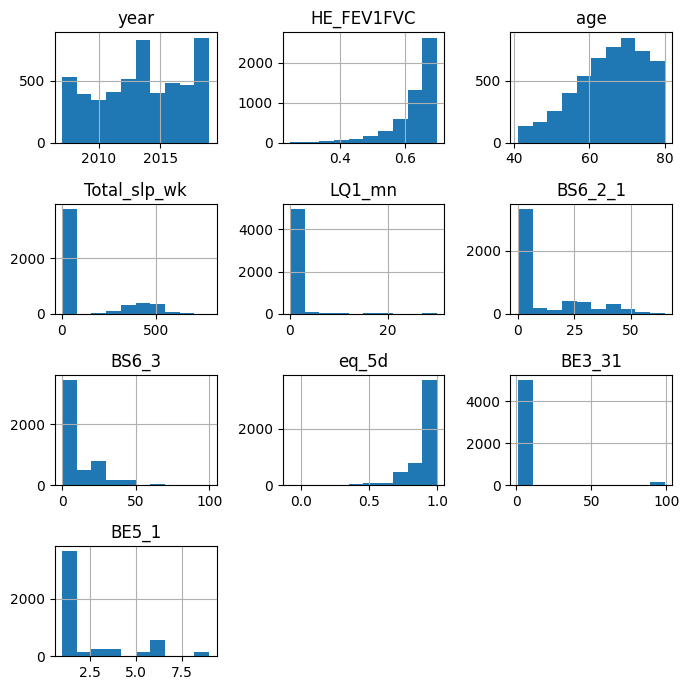

In [18]:
ff[f_NUMERIC + TARGETS].hist(figsize=(7, 7))
plt.tight_layout()

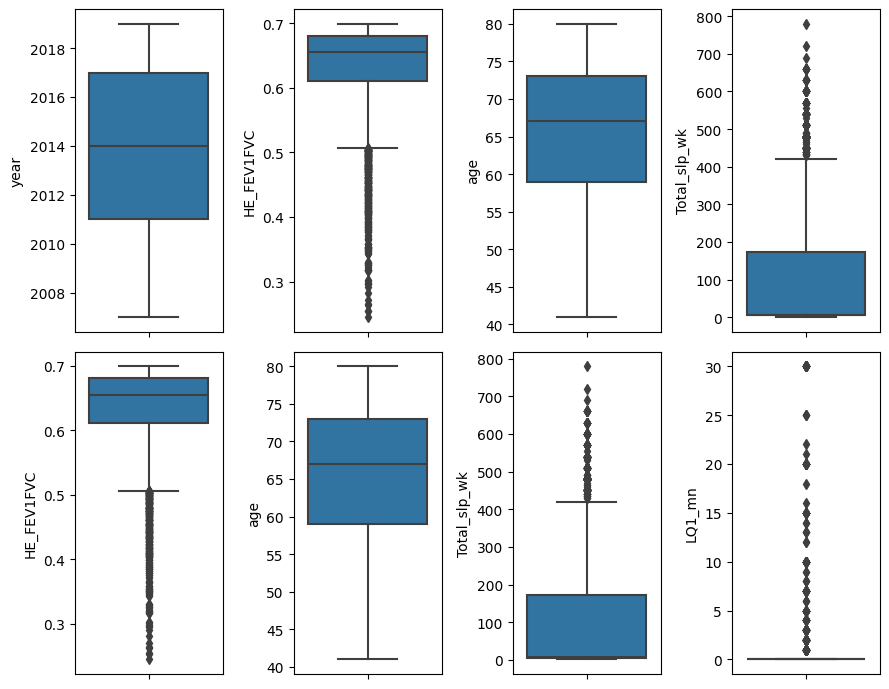

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(9, 7))
rows = len(f_NUMERIC) // 4
cols = len(f_NUMERIC) // rows
for j in range(rows):
    for k in range(cols):
        sns.boxplot(y=ff[f_NUMERIC[j+k]], ax=axes[j, k])
plt.tight_layout()

In [29]:
len(f_CATEGORICAL)

22

In [35]:
def pairplot_with_hue(hue):
    sns.pairplot(ff[[hue, 'BE3_31', 'BE5_1']], hue=hue)

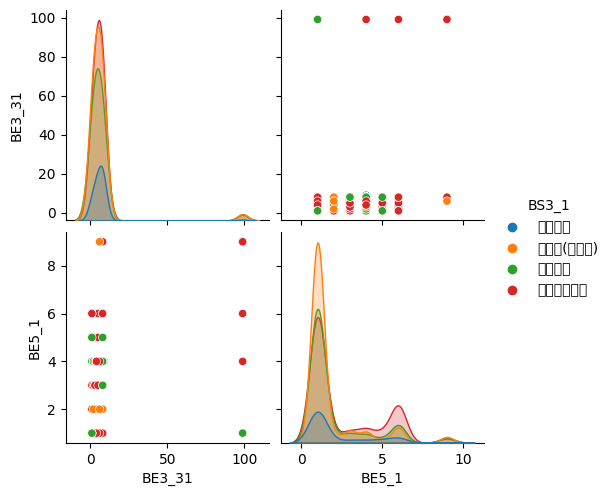

In [46]:
pairplot_with_hue(f_ONE_HOT[0])